In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Inches,Ram,Weight,Price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,8,1.37,71378.6832,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,13.3,8,1.34,47895.5232,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15.6,8,1.86,30636.0000,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,15.4,16,1.83,135195.3360,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,13.3,8,1.37,96095.8080,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [28]:
#Final dataset check

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Columns: 338 entries, Inches to OpSys_macOS
dtypes: bool(334), float64(3), int64(1)
memory usage: 465.3 KB


Data

In [241]:
ram = df_original["Ram"].str.replace("GB","").astype(int).values
weight = df_original["Weight"].str.replace("kg","").astype(float).values
inches = df_original["Inches"].values
y = df_original["Price"].values

In [242]:
ram = (ram - ram.mean())/ram.std()
weight = (weight - weight.mean())/weight.std()
inches = (inches - inches.mean())/inches.std()

In [243]:
b0=b1=b2=b3 = 0

lr = 0.001
epochs = 4000
n = len(y)

lambda_ridge = 10   # regularization strength

In [244]:
# eqation = Cost=MSE+λ(b12+b22+b32)

In [245]:
for i in range(epochs):

    y_pred = b0 + b1*ram + b2*weight + b3*inches

    db0 = (-2/n)*np.sum(y - y_pred)
    db1 = (-2/n)*np.sum(ram*(y - y_pred)) + 2*lambda_ridge*b1
    db2 = (-2/n)*np.sum(weight*(y - y_pred)) + 2*lambda_ridge*b2
    db3 = (-2/n)*np.sum(inches*(y - y_pred)) + 2*lambda_ridge*b3

    b0 -= lr*db0
    b1 -= lr*db1
    b2 -= lr*db2
    b3 -= lr*db3

In [246]:
print("Ridge coefficients:")
print("b0:", b0)
print("b1:", b1)
print("b2:", b2)
print("b3:", b3)

Ridge coefficients:
b0: 59850.1189934348
b1: 2490.3705210603416
b2: 615.2482267627254
b3: 130.63623389362223


In [247]:
b0_l=b1_l=b2_l=b3_l = 0

lambda_lasso = 10

In [248]:
for i in range(epochs):

    y_pred = b0_l + b1_l*ram + b2_l*weight + b3_l*inches

    db0 = (-2/n)*np.sum(y - y_pred)
    db1 = (-2/n)*np.sum(ram*(y - y_pred)) + lambda_lasso*np.sign(b1_l)
    db2 = (-2/n)*np.sum(weight*(y - y_pred)) + lambda_lasso*np.sign(b2_l)
    db3 = (-2/n)*np.sum(inches*(y - y_pred)) + lambda_lasso*np.sign(b3_l)

    b0_l -= lr*db0
    b1_l -= lr*db1
    b2_l -= lr*db2
    b3_l -= lr*db3

In [249]:
print("Lasso coefficients:")
print("b0:", b0_l)
print("b1:", b1_l)
print("b2:", b2_l)
print("b3:", b3_l)

Lasso coefficients:
b0: 59850.11899343482
b1: 28403.538804350694
b2: 1202.6237004420468
b3: -5183.8903526029


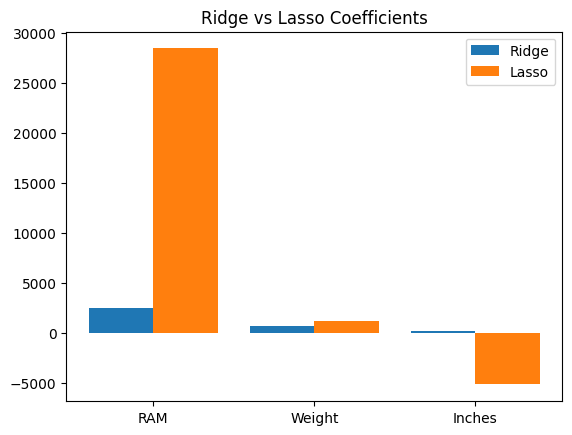

In [250]:
labels = ["RAM","Weight","Inches"]

ridge_vals = [b1,b2,b3]
lasso_vals = [b1_l,b2_l,b3_l]

x = np.arange(len(labels))

plt.bar(x-0.2, ridge_vals, width=0.4, label="Ridge")
plt.bar(x+0.2, lasso_vals, width=0.4, label="Lasso")

plt.xticks(x, labels)
plt.legend()
plt.title("Ridge vs Lasso Coefficients")
plt.show()

In [251]:
b0=b1=b2=b3 = 0

lr = 0.001
epochs = 4000
n = len(y)

lambda_ridge = 10
cost_ridge = []

for i in range(epochs):

    y_pred = b0 + b1*ram + b2*weight + b3*inches

    cost = (1/n)*np.sum((y - y_pred)**2) + lambda_ridge*(b1**2 + b2**2 + b3**2)
    cost_ridge.append(cost)

    db0 = (-2/n)*np.sum(y - y_pred)
    db1 = (-2/n)*np.sum(ram*(y - y_pred)) + 2*lambda_ridge*b1
    db2 = (-2/n)*np.sum(weight*(y - y_pred)) + 2*lambda_ridge*b2
    db3 = (-2/n)*np.sum(inches*(y - y_pred)) + 2*lambda_ridge*b3

    b0 -= lr*db0
    b1 -= lr*db1
    b2 -= lr*db2
    b3 -= lr*db3

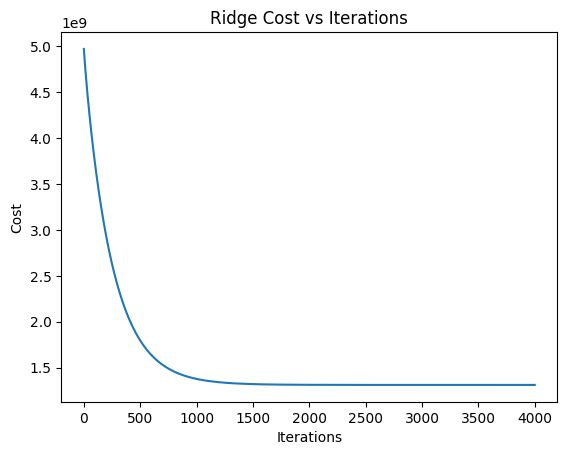

In [252]:
plt.plot(cost_ridge)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Ridge Cost vs Iterations")
plt.show()

In [253]:
b0_l=b1_l=b2_l=b3_l = 0
lambda_lasso = 10

cost_lasso = []

for i in range(epochs):

    y_pred = b0_l + b1_l*ram + b2_l*weight + b3_l*inches

    cost = (1/n)*np.sum((y - y_pred)**2) + lambda_lasso*(abs(b1_l)+abs(b2_l)+abs(b3_l))
    cost_lasso.append(cost)

    db0 = (-2/n)*np.sum(y - y_pred)
    db1 = (-2/n)*np.sum(ram*(y - y_pred)) + lambda_lasso*np.sign(b1_l)
    db2 = (-2/n)*np.sum(weight*(y - y_pred)) + lambda_lasso*np.sign(b2_l)
    db3 = (-2/n)*np.sum(inches*(y - y_pred)) + lambda_lasso*np.sign(b3_l)

    b0_l -= lr*db0
    b1_l -= lr*db1
    b2_l -= lr*db2
    b3_l -= lr*db3

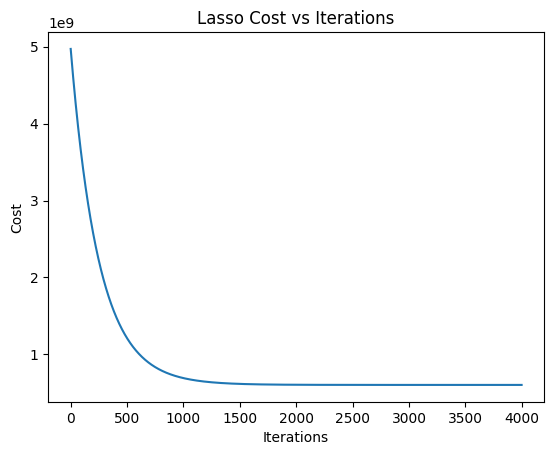

In [255]:
plt.plot(cost_lasso)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Lasso Cost vs Iterations")
plt.show()

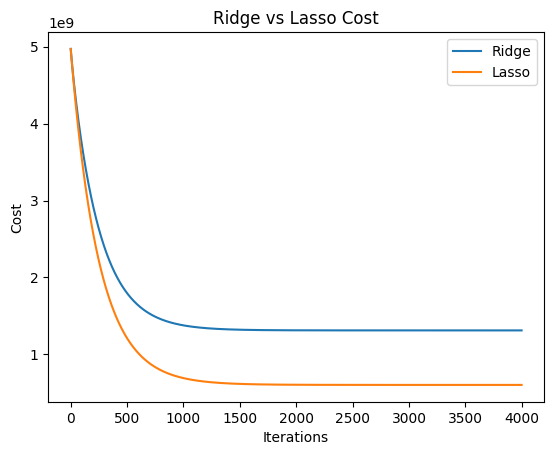

In [256]:
plt.plot(cost_ridge, label="Ridge")
plt.plot(cost_lasso, label="Lasso")
plt.legend()
plt.title("Ridge vs Lasso Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()